In [2]:
# Core imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import nibabel as nib

# SAM model imports
from segment_anything import sam_model_registry, SamPredictor



In [4]:
!pip install nibabel opencv-python matplotlib



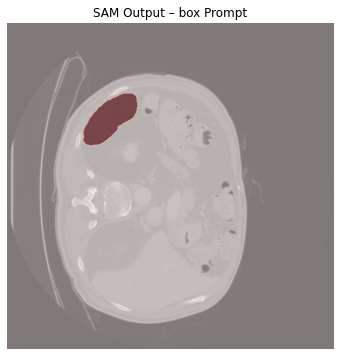

True

In [18]:
import nibabel as nib
import cv2
import numpy as np
import matplotlib.pyplot as plt

from segment_anything import sam_model_registry, SamPredictor

# === Load image (CT slice) ===
image_path = "/Users/olihiidikwu/Downloads/Task07_Pancreas/imagesTr/pancreas_005.nii.gz"
img_data = nib.load(image_path).get_fdata()

slice_index = 55
image_slice = img_data[:, :, slice_index]

# Normalize + convert to RGB
image_norm = ((image_slice - np.min(image_slice)) / (np.max(image_slice) - np.min(image_slice)) * 255).astype(np.uint8)
image_rgb = cv2.cvtColor(image_norm, cv2.COLOR_GRAY2RGB)

# === Load SAM model ===
sam_checkpoint = "/Users/olihiidikwu/Downloads/sam_vit_b_01ec64.pth"  # Update if different
model_type = "vit_b"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)
predictor.set_image(image_rgb)

# === Apply Point Prompt ===`
input_box = np.array([[100,130,170,180]])  # Adjust coordinates as needed
input_label = np.array([1])  # 1 = foreground

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False
)

# === Visualize ===
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.imshow(masks[0], alpha=0.5, cmap='Reds')
plt.title("SAM Output – box Prompt")
plt.axis('off')
plt.show()

# === Save Output ===
cv2.imwrite("point.png", (masks[0] * 255).astype(np.uint8))
